In [2]:
## Maybe try the multiprocessing library....? to run simulatons??

import yfinance as yf
import ta
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from statsmodels.graphics.tsaplots import plot_acf
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore")

In [3]:
data = yf.Ticker("NKE")

nke_df = pd.DataFrame(data.history(period='max'))
nke_df_filtered = nke_df[nke_df.index >= '2020-01-01']
nke_df_filtered['Log Return'] = np.log(nke_df_filtered['Close'] / nke_df_filtered['Close'].shift(1))
nke_df_filtered.head(3)

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Log Return
Date,,,,,,,,
2020-01-02 00:00:00-05:00,95.212922,96.011372,94.893538,96.001976,5644100,0.0,0.0,NaN
2020-01-03 00:00:00-05:00,94.489633,95.814126,94.226615,95.738976,4541800,0.0,0.0,-0.002743
2020-01-06 00:00:00-05:00,94.827790,95.663815,94.752648,95.654427,4612400,0.0,0.0,-0.000884


In [4]:
nke_df_filtered.tail(10)

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Log Return
Date,,,,,,,,
2025-03-04 00:00:00-05:00,77.699997,78.650002,76.779999,77.320000,10034100,0.0,0.0,-0.013999
2025-03-05 00:00:00-05:00,77.330002,78.309998,76.459999,77.809998,9853600,0.0,0.0,0.006317
2025-03-06 00:00:00-05:00,76.739998,78.330002,76.739998,77.709999,9623700,0.0,0.0,-0.001286
2025-03-07 00:00:00-05:00,77.480003,79.000000,76.970001,78.589996,9294300,0.0,0.0,0.011260
2025-03-10 00:00:00-04:00,77.510002,80.190002,76.059998,76.400002,15822600,0.0,0.0,-0.028262
2025-03-11 00:00:00-04:00,75.910004,76.080002,73.620003,74.169998,12837000,0.0,0.0,-0.029623
2025-03-12 00:00:00-04:00,74.360001,74.500000,73.230003,73.580002,12304900,0.0,0.0,-0.007986
2025-03-13 00:00:00-04:00,73.180000,73.940002,71.669998,72.639999,10195900,0.0,0.0,-0.012858
2025-03-14 00:00:00-04:00,73.279999,73.540001,71.320000,71.660004,12183000,0.0,0.0,-0.013583


In [5]:
mu = nke_df_filtered['Close'].mean()
sigma = nke_df_filtered['Close'].std()
print(mu)
print(sigma)
log_mu = nke_df_filtered['Log Return'].mean()
log_sigma = nke_df_filtered['Log Return'].std()
print(log_mu)
print(log_sigma)


n_simulations = 2
n_steps = 252  # 1 trading year (252 days)
start_price = nke_df_filtered['Close'].iloc[0]
print(start_price)
# mu = 0  # Mean return (0 for pure random walk)
# sigma = 24  # Standard deviation of returns



108.90351431085429
24.07835559294079
-0.00020226933201163778
0.022018520466088362
96.0019760131836


In [6]:
def monte_carlo_simulation(start_price, n_steps, n_simulations):
    simulations = np.zeros((n_simulations, n_steps))
    # drift = mu - (sigma**2) / 2

    for i in range(n_simulations):
        price = start_price
        for j in range(n_steps):
            #random_shock = np.random.normal(mu, sigma)
            random_shock = np.random.normal(0.08, 1.5) #.08 comes from the average return of the S&P 500
            #print(random_shock)
            price = price + random_shock
            #print(price)
            simulations[i, j] = price
    
    return simulations

##This approach would be better for log return
def monte_carlo_simulation_take2(start_price, mu,sigma, n_steps, n_simulations):
    simulations = np.zeros((n_simulations, n_steps))

    for i in range(n_simulations):
        price = start_price
        for j in range(n_steps):
            #random_shock = np.random.normal(mu, sigma)
            next_price = np.random.normal(mu, sigma)  # Standard normal distribution
            price = next_price 
            simulations[i, j] = price
    
    return simulations


In [7]:
simulated_prices = monte_carlo_simulation(start_price, n_steps, n_simulations)
simulated_prices_take2 = monte_carlo_simulation_take2(start_price, mu, sigma, n_steps, n_simulations)

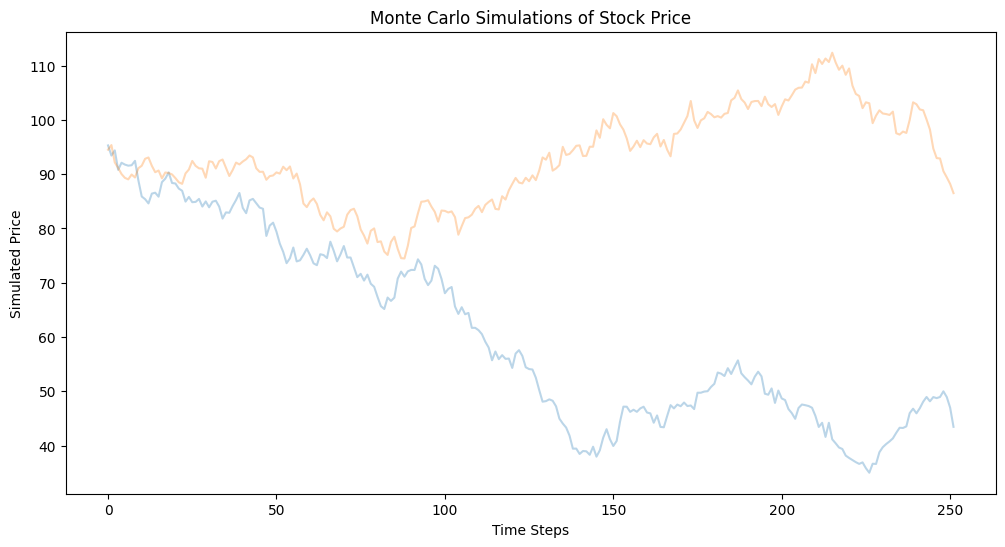

In [8]:
plt.figure(figsize=(12, 6))
for i in range(n_simulations):
    plt.plot(simulated_prices[i], alpha=0.3)  # Plot each simulation
plt.xlabel("Time Steps")
plt.ylabel("Simulated Price")
plt.title("Monte Carlo Simulations of Stock Price")
plt.show()

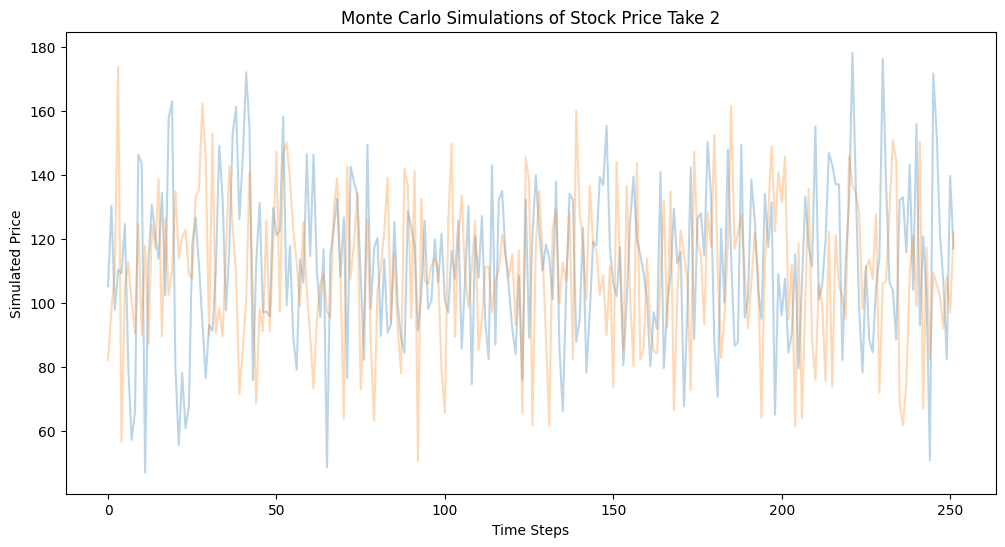

In [9]:
plt.figure(figsize=(12, 6))
for i in range(n_simulations):
    plt.plot(simulated_prices_take2[i], alpha=0.3)  # Plot each simulation
plt.xlabel("Time Steps")
plt.ylabel("Simulated Price")
plt.title("Monte Carlo Simulations of Stock Price Take 2")
plt.show()

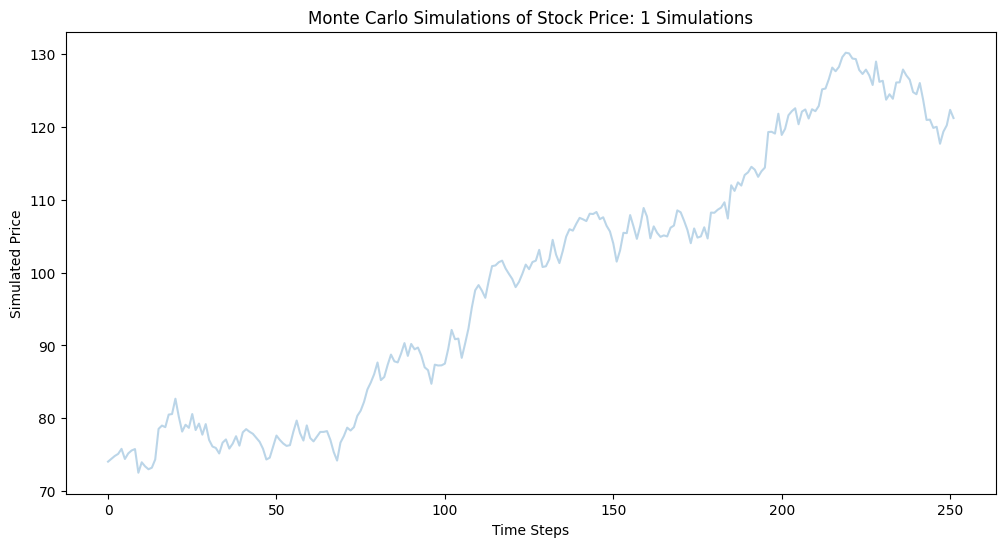

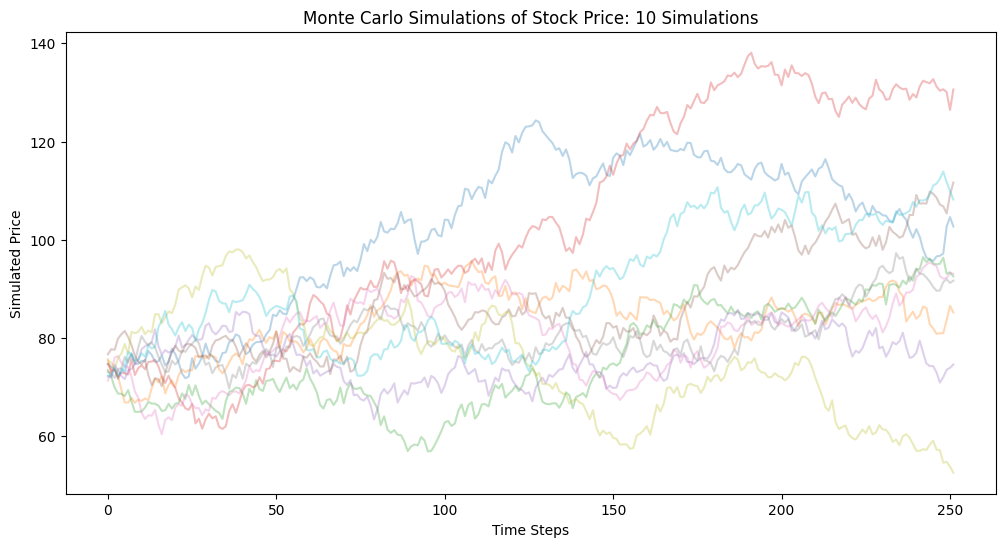

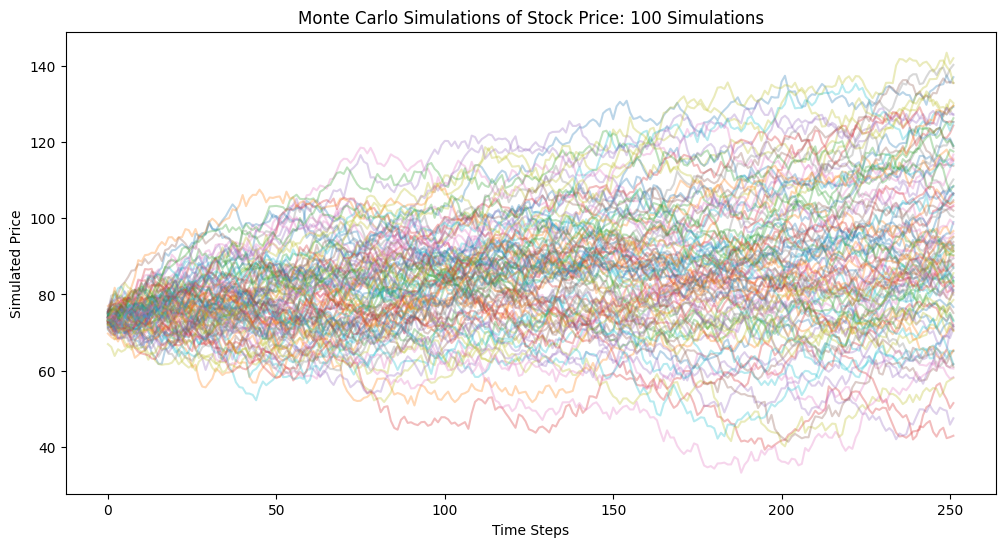

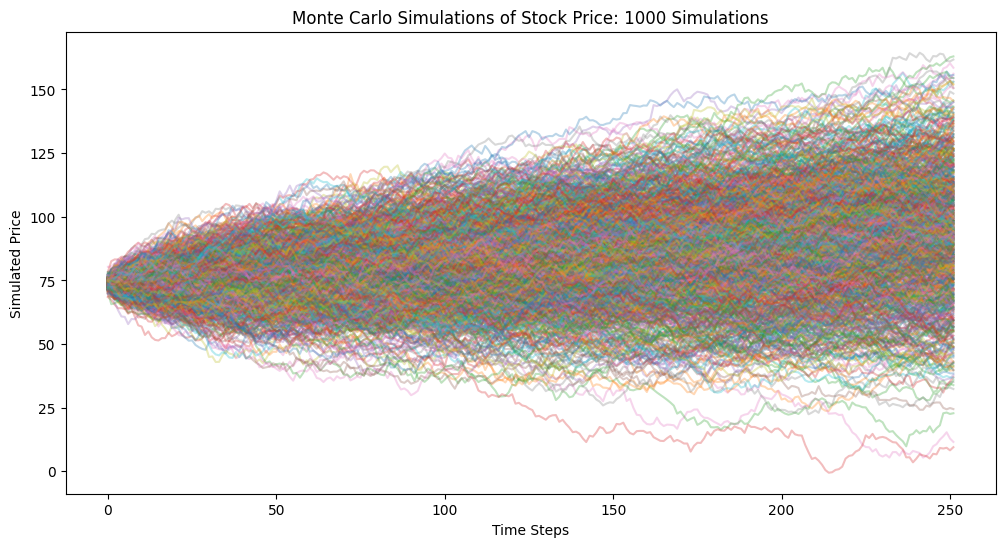

In [10]:
n_simulations = [1, 10, 100, 1000]
# n_simulations = [1, 10, 100, 1000, 10000] ## 10000 takes 22 seconds 1000 only takes 2 seconds
n_steps = 252  # 1 trading year (252 days)
start_price = nke_df_filtered['Close'].iloc[-1]
mu = nke_df_filtered['Close'].mean()
sigma = nke_df_filtered['Close'].std()

for n in n_simulations:
    simulated_prices = monte_carlo_simulation(start_price, n_steps, n)
    plt.figure(figsize=(12, 6))
    for i in range(n):
        plt.plot(simulated_prices[i], alpha=0.3)  # Plot each simulation
    plt.xlabel("Time Steps")
    plt.ylabel("Simulated Price")
    plt.title(f"Monte Carlo Simulations of Stock Price: {n} Simulations")
    plt.show()

In [11]:
n = 1000
n_steps = 252

mu = nke_df_filtered['Close'].mean()
sigma = nke_df_filtered['Close'].std()
start_price = start_price = nke_df_filtered['Close'].iloc[-1]
simulated_prices_ = monte_carlo_simulation(start_price, n_steps, n)

final_prices = simulated_prices[:, -1]  # Last column contains final prices
lower_bound = np.percentile(final_prices, 2.5)  # 2.5th percentile
upper_bound = np.percentile(final_prices, 97.5)  # 97.5th percentile

print(f"95% Confidence Interval: {lower_bound} to {upper_bound}")
print("--------------------")


##Calculating % return  chances
thresholds = [.05, 0.10, 0.20, 0.30, -.05, -0.10, -0.20, -0.30]
threshold_prices = {t: start_price * (1 + t) for t in thresholds}

# Calculate probabilities for each threshold
probabilities = {}
for t, price in threshold_prices.items():
    if t > 0:
        probabilities[f"{int(t * 100)}% return or higher"] = np.mean(final_prices >= price)
    else:
        probabilities[f"{int(t * 100)}% return or lower"] = np.mean(final_prices <= price)

# Print probabilities
for desc, prob in probabilities.items():
    print(f"Probability of {desc}: {prob * 100:.2f}%")
print("--------------------")

##Calculate worst Case and Worst Case returns 
best_case_index = np.argmax(simulated_prices[:, -1])  # Index of highest final price
worst_case_index = np.argmin(simulated_prices[:, -1])  # Index of lowest final price

best_case_val = simulated_prices[best_case_index][-1]
worst_case_val = simulated_prices[worst_case_index][-1]

best_case_ret = best_case_val - start_price
best_case_ret_pct = (best_case_val - start_price) / start_price * 100
print(f"Best Case Return: {best_case_ret} , %: {best_case_ret_pct}")

worst_case_ret = worst_case_val - start_price
worst_case_ret_pct = (worst_case_val - start_price) / start_price * 100
print(f"Worst Case Return: {worst_case_ret} , %: {worst_case_ret_pct}")


95% Confidence Interval: 45.24619913490041 to 140.83923519952884
--------------------
Probability of 5% return or higher: 76.70%
Probability of 10% return or higher: 72.00%
Probability of 20% return or higher: 59.20%
Probability of 30% return or higher: 46.10%
Probability of -5% return or lower: 15.80%
Probability of -10% return or lower: 12.30%
Probability of -20% return or lower: 7.50%
Probability of -30% return or lower: 4.40%
--------------------
Best Case Return: 89.28761537746468 , %: 121.15009372411414
Worst Case Return: -64.20418487637494 , %: -87.1155868859317


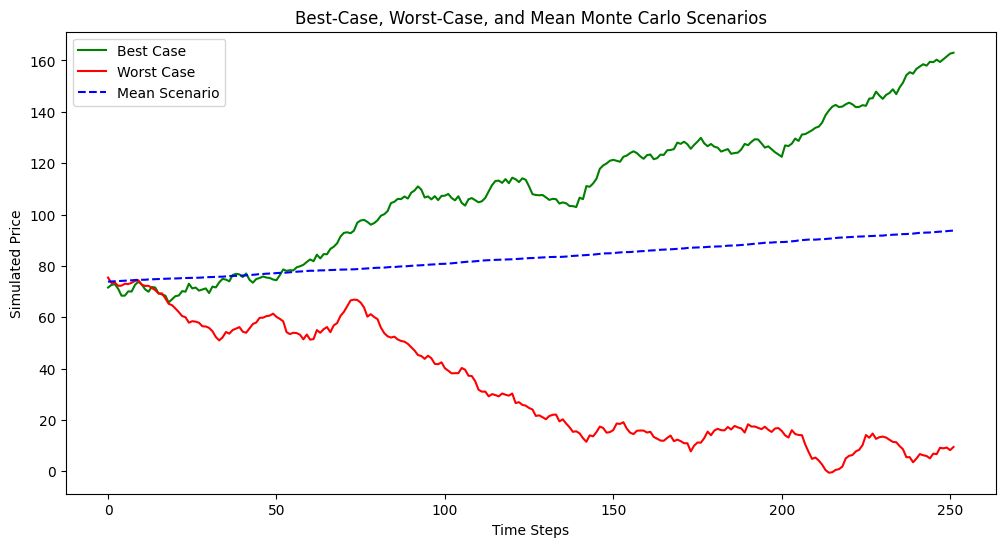

In [12]:
#Case vs Worse Case

best_case_index = np.argmax(simulated_prices[:, -1])  # Index of highest final price
worst_case_index = np.argmin(simulated_prices[:, -1])  # Index of lowest final price

# Extract the best and worst paths
best_case_path = simulated_prices[best_case_index]
worst_case_path = simulated_prices[worst_case_index]

# Calculate the mean scenario (mean price at each time step)
mean_case_path = np.mean(simulated_prices, axis=0)

# Plot the best-case, worst-case, and mean scenarios
plt.figure(figsize=(12, 6))
plt.plot(best_case_path, label="Best Case", color="green")
plt.plot(worst_case_path, label="Worst Case", color="red")
plt.plot(mean_case_path, label="Mean Scenario", color="blue", linestyle="--")
plt.xlabel("Time Steps")
plt.ylabel("Simulated Price")
plt.title("Best-Case, Worst-Case, and Mean Monte Carlo Scenarios")
plt.legend()
plt.show()

In [ ]:
## Block is not working

from multiprocessing import Pool
import multiprocessing

def monte_carlo_simulation_worker(args):
    start_price, n_steps, n_simulations = args
    simulations = np.zeros((n_simulations, n_steps))

    for i in range(n_simulations):
        price = start_price
        for j in range(n_steps):
            # Random shock with skewed mean of 0.08 and std deviation of 1.5
            random_shock = np.random.normal(0.08, 1.5)
            price = price + random_shock
            simulations[i, j] = price
    
    return simulations

if __name__ == "__main__":
    n_simulations = [1, 10, 100, 1000, 10000]
    n_steps = 252  # 1 trading year (252 days)
    start_price = nke_df_filtered['Close'].iloc[-1]
    
    for n in n_simulations:
        # Divide simulations into chunks for multiprocessing
        cpu_count = 4  # Set number of processes in the Pool
        simulations_per_worker = n // cpu_count
        remaining_simulations = n % cpu_count  # Handle extra simulations if n is not divisible by cpu_count

        # Create argument list for the workers
        args = [(start_price, n_steps, simulations_per_worker) for _ in range(cpu_count)]
        
        # Add the extra simulations to one of the workers if necessary
        if remaining_simulations > 0:
            args.append((start_price, n_steps, remaining_simulations))
        
        # Use Pool to execute the simulations in parallel
        with multiprocessing.Pool(cpu_count) as pool:
            results = pool.map(monte_carlo_simulation_worker, args)

        # Combine the results from all workers
        simulated_prices = np.vstack(results)  # Stack all the chunks into a single 2D array

        # Plot the simulations
        plt.figure(figsize=(12, 6))
        for i in range(n):
            plt.plot(simulated_prices[i], alpha=0.3)  # Plot each simulation
        plt.xlabel("Time Steps")
        plt.ylabel("Simulated Price")
        plt.title(f"Monte Carlo Simulations of Stock Price: {n} Simulations")
        plt.show()